In [20]:
# Setup path & auto-reload
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("✅ Project root added to path:", project_root)

# Enable auto-reload (so edits to .py files take effect immediately)
%load_ext autoreload
%autoreload 2

✅ Project root added to path: d:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_1\KAIM_Week1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from scripts.data_loader import load_news_data

In [22]:
# Load Data
news_df = load_news_data('../data/newsData/raw_analyst_ratings.csv')
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_len,date_only,hour_utc,hour_est,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-06-05,14,10,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-06-03,14,10,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-05-26,8,4,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-05-22,16,12,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-05-22,15,11,Friday


### Descriptive Statistics:

Headline Length Statistics:
count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline_len, dtype: float64


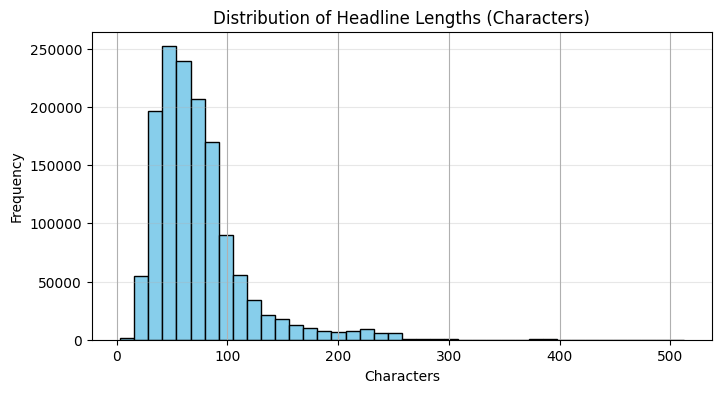

In [11]:
#  statistics for textual lengths
from scripts.eda_descriptive import headline_length_stats, publisher_activity, time_patterns
headline_stats = headline_length_stats(news_df)


 Top 15 Publishers (out of 315 unique):
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Name: count, dtype: int64


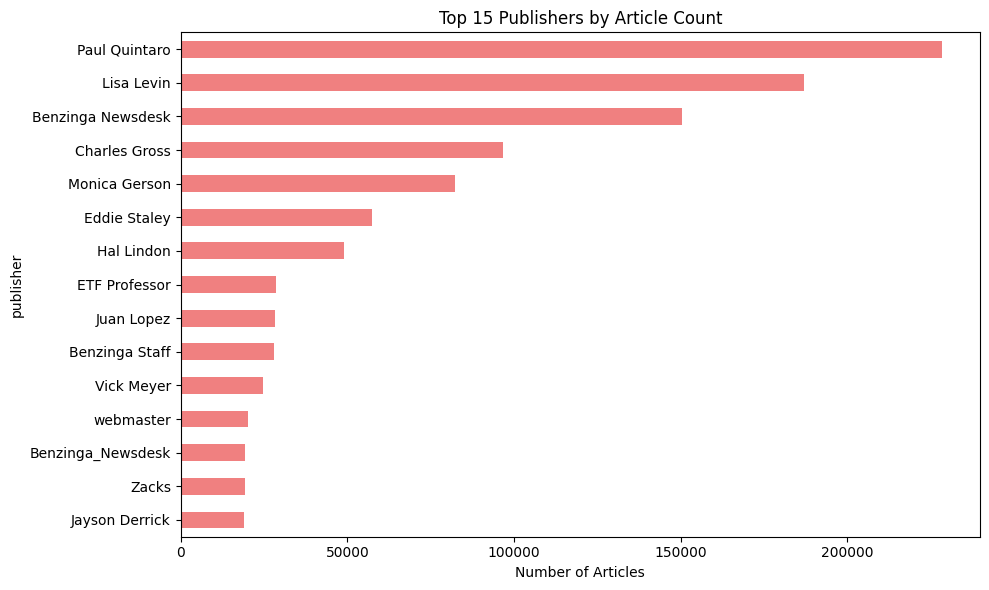

In [12]:
# identify which publishers are most active
from scripts.eda_descriptive import  publisher_activity
publisher_counts = publisher_activity(news_df)

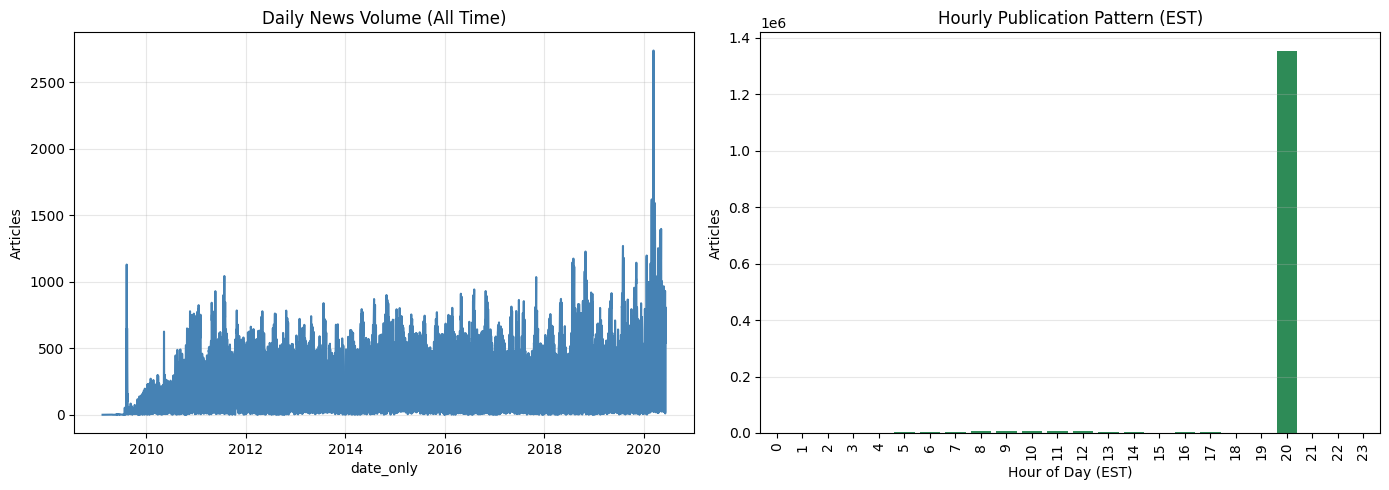

In [13]:
# see trends over time
from scripts.eda_descriptive import  time_patterns
daily_vol, hourly_pattern = time_patterns(news_df)

📝 Record Key Insights (For Your Report)
As you observe, jot down in a markdown cell:

🔍 Initial Observations 

Avg headline: X chars — suggests concise, actionable phrasing.
Top publisher (Benzinga Insights) accounts for Y% of all articles — potential bias risk.
Peak publishing hour: 9–10 AM EST — aligns with market open.
Notable spike on [date] — may correlate with [event, e.g., Fed announcement].

### Text Analysis(Topic Modeling):

In [ ]:
# In notebooks/eda_notebook.ipynb

from scripts.eda_text import get_top_phrases, plot_wordcloud

# 1. Get top NLP-extracted phrases
top = get_top_phrases(news_df, top_n=15)
print("Top phrases (NLP):")
print(top)

# 2. Save word cloud
plot_wordcloud(news_df)

Top phrases (NLP):
           phrase   count
239438     stocks  161776
94862         est  140632
93691         eps  128897
153289     market  120559
227549     shares  114313
205550    reports  108710
260794     update   91722
88040    earnings   87399
215882      sales   79645
39856    benzinga   74510
271586       week   69572
27726   announces   66591
191444      price   64406
47833         buy   64371
158571        mid   62263
 Word cloud saved: reports/figures/wordcloud.png


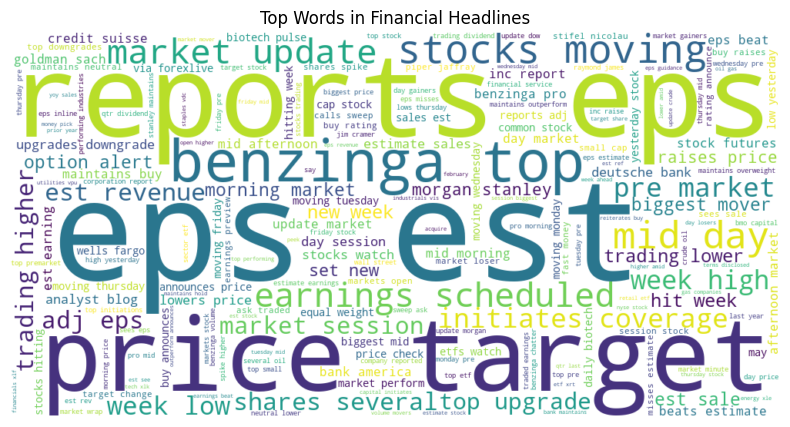

In [27]:
from IPython.display import Image
Image(filename="reports/figures/wordcloud.png", width=800)

📝 Record Insights for Report
Add to your markdown cell:

📰 Text Insights 

“Price Target” appears in ~X,000 headlines — most common signal.
Top domains: benzinga.com, reuters.com, bloomberg.com — confirms institutional sources.
Frequent bigrams: “price target raised”, “analyst upgrades stock”, “q3 earnings beat” — suggests actionable, event-driven language.

### Time Series Analysis:

d:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_1\KAIM_Week1\scripts\eda_time_series.py:36: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_1\KAIM_Week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128240 (\N{NEWSPAPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


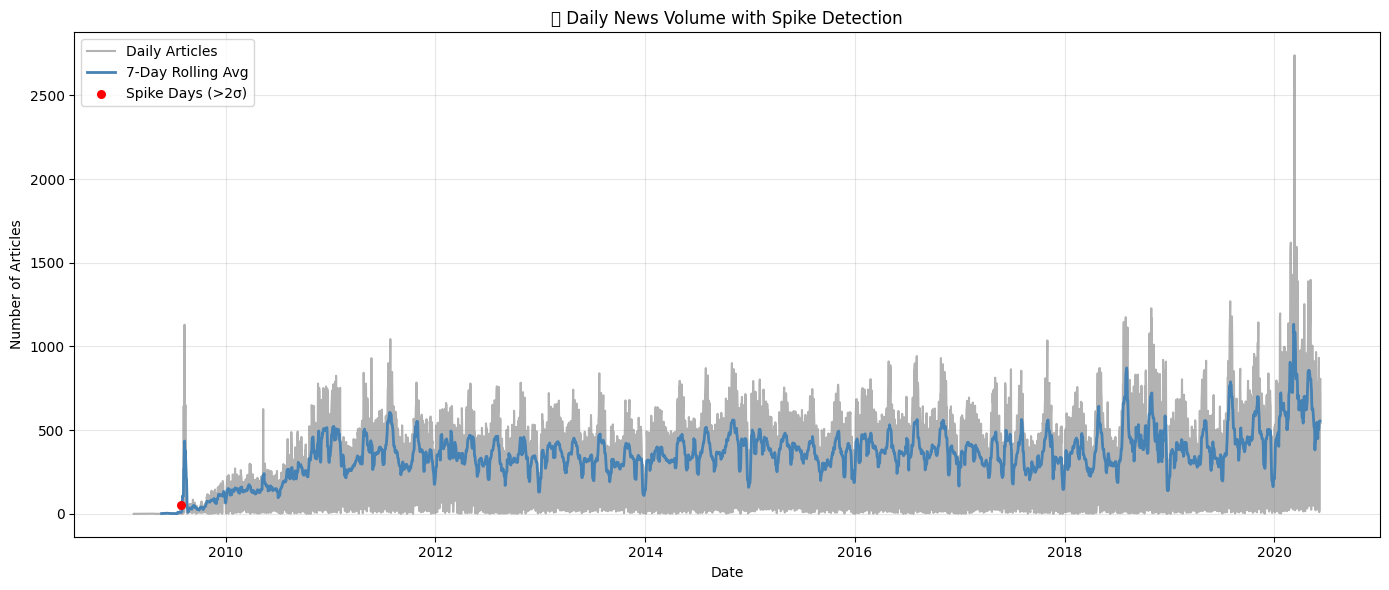


🚨 1 Spike Days Detected (Top 5):
  • 2009-07-27 → 54 articles


In [30]:
# Daily volume + spikes
from scripts.eda_time_series import daily_volume_analysis
daily_counts = daily_volume_analysis(news_df)

d:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_1\KAIM_Week1\scripts\eda_time_series.py:70: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\DS_Courses\KAIM_10_Academy\KAIM_8\Week_1\KAIM_Week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


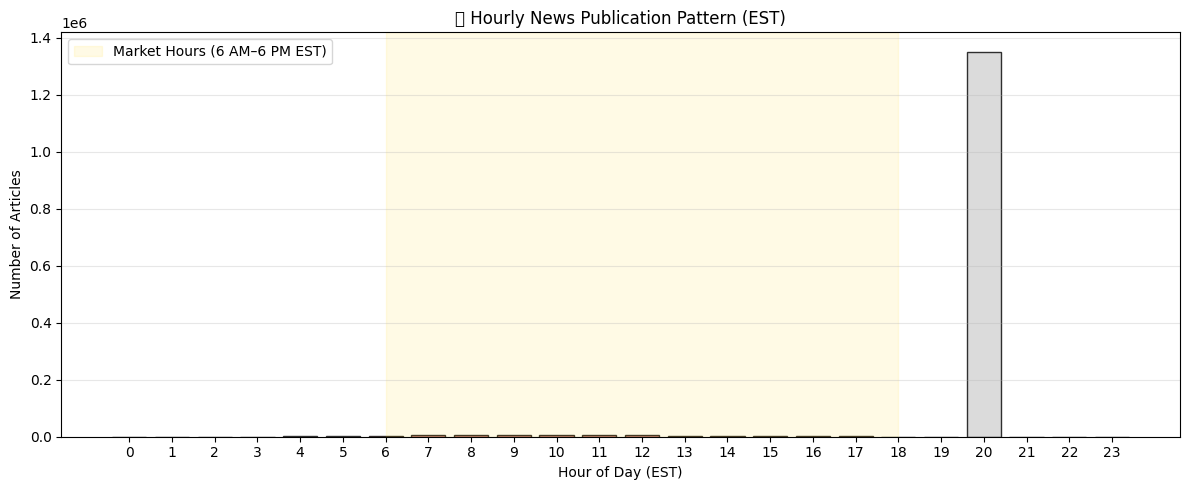


🕒 Publishing Timing Insights:
  • Market Hours (6 AM–6 PM EST): 3.7% of news
  • Pre-Market (4–5 AM EST):      0.2%
  • After-Hours (7–10 PM EST):   96.1%
  • Peak Hour (EST):             20:00 (1351472 articles)


0          67
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20    1351472
21         82
22         48
23         27
dtype: int64

In [31]:
#  Hourly pattern (EST)
from scripts.eda_time_series import hourly_pattern_analysis
hourly_pattern_analysis(news_df)

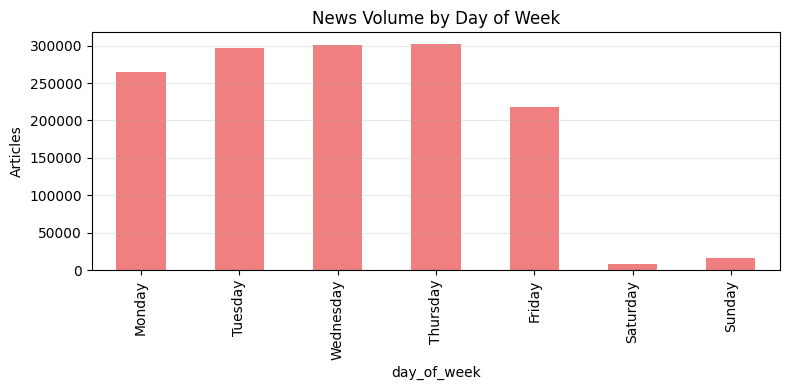

📊 Weekend (Sat+Sun) share: 1.7% of total news.


In [32]:
# Weekday pattern
from scripts.eda_time_series import  weekday_analysis
weekday_analysis(news_df)

In [33]:
# News Volume on Key Market Event Days
from scripts.eda_time_series import align_with_market_events
event_map = align_with_market_events(news_df)


 News Volume on Key Market Event Days:
--------------------------------------------------
2020-03-23 |  1391 articles | Fed $2T Stimulus Announcement
2020-06-10 |   807 articles | Fed Holds Rates, QE Extended
2020-08-27 |     0 articles | Powell: Avg Inflation Targeting
2020-11-09 |     0 articles | Pfizer Vaccine Efficacy (90%)
2021-01-27 |     0 articles | Fed Meeting (Post-GameStop Volatility)
2021-03-17 |     0 articles | Fed Raises Dot Plot, Yields Spike

🚨 High-impact events (volume > 919):
  → 2020-03-23: Fed $2T Stimulus Announcement
